In [ ]:
!pip install zarr
!pip install fsspec
!pip install cartopy
!pip install cftime
!pip install os
!pip install --upgrade git+https://github.com/pangeo-data/xESMF.git

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 21.6 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5034 sha256=e8ff39a82174f83b6c0f1ebde0a7815c2415fa35090c58fcc37af1be83e6e093
  Stored in directory: /root/.cache/pip/wheels/7f/4e/be/1171b40f43b918087657ec57cf3b81fa1a2e027d8755baa184
Successfully built asciitree
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.2 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
  Cloning https://github.com/pangeo-data/xESMF.git to /tmp/pip-req-build-5kkt1zpz
  Running command git clone --filter=blob:none --quiet https://github.com/pangeo-data/xESMF.git /tmp/pip-req-build-5kkt1zpz
  Resolved https

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import scipy.stats as stats
import zarr
import fsspec
import cartopy.crs as ccrs
import os
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706


In [ ]:
df_ta = df.query("table_id == 'day' & variable_id == 'hur' & member_id == 'r1i1p1f1' & experiment_id == 'historical' ")
df_ta

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
9583,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,day,hur,gr2,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/histo...,NaN,20180701
28943,CMIP,IPSL,IPSL-CM6A-LR,historical,r1i1p1f1,day,hur,gr,gs://cmip6/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/histor...,NaN,20180803
40071,CMIP,NASA-GISS,GISS-E2-1-G,historical,r1i1p1f1,day,hur,gn,gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/hi...,NaN,20181015
43486,CMIP,BCC,BCC-CSM2-MR,historical,r1i1p1f1,day,hur,gn,gs://cmip6/CMIP6/CMIP/BCC/BCC-CSM2-MR/historic...,NaN,20181127
52891,CMIP,BCC,BCC-ESM1,historical,r1i1p1f1,day,hur,gn,gs://cmip6/CMIP6/CMIP/BCC/BCC-ESM1/historical/...,NaN,20190128
55982,CMIP,NCAR,CESM2-WACCM,historical,r1i1p1f1,day,hur,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,NaN,20190227
58882,CMIP,NCAR,CESM2,historical,r1i1p1f1,day,hur,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
68307,CMIP,SNU,SAM0-UNICON,historical,r1i1p1f1,day,hur,gn,gs://cmip6/CMIP6/CMIP/SNU/SAM0-UNICON/historic...,NaN,20190323
98614,CMIP,CCCma,CanESM5,historical,r1i1p1f1,day,hur,gn,gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...,NaN,20190429
204219,CMIP,INM,INM-CM4-8,historical,r1i1p1f1,day,hur,gr1,gs://cmip6/CMIP6/CMIP/INM/INM-CM4-8/historical...,NaN,20190530


In [ ]:
df_ta_ = df_ta.query("member_id == 'r1i1p1f1' & source_id=='CMCC-CM2-HR4'")
df_ta_ncar=df_ta_
df_ta_ncar

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
469556,CMIP,CMCC,CMCC-CM2-HR4,historical,r1i1p1f1,day,hur,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-HR4/histor...,NaN,20200904


In [ ]:
# # prompt: Crop and load df_ta_ncar for bangladesh

# # Assuming df_ta_ncar is defined as in the previous code.
# # This code crops the data for Bangladesh and loads it.

# import pandas as pd
# import xarray as xr

# # Example coordinates for Bangladesh (adjust these as needed)
# min_lat = 20.0
# max_lat = 27.0
# min_lon = 88.0
# max_lon = 93.0


# # Assuming 'df_ta_ncar' is a pandas DataFrame with 'zstore' column.
# # Loop over each zarr store link
# for zstore_link in df_ta_ncar['zstore']:
#   try:
#       # Open the Zarr store
#       ds = xr.open_zarr(fsspec.get_mapper(zstore_link))

#       # Crop the dataset for Bangladesh
#       cropped_ds = ds.sel(lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon))

#       # Load the cropped dataset into memory
#       cropped_ds.load()

#       # Now you can work with the cropped dataset (e.g., plot it, calculate statistics, etc.)
#       print(f"Successfully loaded and cropped data from {zstore_link}")
#       # Example: Print basic information about the cropped data
#       print(cropped_ds)

#       # Perform further operations on cropped_ds here...

#   except Exception as e:
#       print(f"Error processing {zstore_link}: {e}")


In [ ]:
import google.auth.transport.requests
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/path/to/credentials.json"
!pip install google-auth-oauthlib --quiet
import google.oauth2.credentials

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')
# Define the directory path
dir= '/content/drive/MyDrive/HS_Term_paper/'

Mounted at /content/drive


In [ ]:
import xarray as xr
# Load the NetCDF file
ds= xr.open_dataset('/content/avg_hum_Krigging.nc')
ds

<xarray.Dataset> Size: 6MB
Dimensions:   (time: 7305, lat: 10, lon: 10)
Coordinates:
  * lon       (lon) float64 80B 88.0 88.39 88.78 89.17 ... 90.72 91.11 91.5
  * lat       (lat) float64 80B 21.5 21.83 22.17 22.5 ... 23.5 23.83 24.17 24.5
  * time      (time) datetime64[ns] 58kB 1995-01-01 1995-01-02 ... 2014-12-31
Data variables:
    rainfall  (time, lat, lon) float64 6MB ...
Attributes:
    crs:                   EPSG:4326
    title:                 Kriging Interpolated Rainfall Data
    creation_date:         2025-01-04 09:50:01
    interpolation_method:  Ordinary Kriging (spherical variogram)
    grid_size:             10
    bounds:                lat: [21.5, 24.5], lon: [88, 91.5]

In [ ]:
!pip install zarr --quiet
import zarr
print(zarr.__version__)

2.18.3


In [ ]:
import pandas as pd
import numpy as np
import xarray as xr
import fsspec

# Define the latitude and longitude range for clipping
lat_range = slice(17, 29)  # Example latitude range from 17 to 29 degrees
lon_range = slice(84, 96)  # Example longitude range from 84 to 96 degrees

# Pre-compute new grid coordinates
new_lon = np.arange(88.52, 90.82, 0.25)
new_lat = np.arange(21.99, 24.99, 0.25)

# Function to calculate annual sum and regrid
def calculate_annual_sum_and_regrid(ds, new_lon, new_lat):
    # Clip the dataset to the desired time range
    ds_clipped = ds.sel(time=slice('1995-01-01', '2014-12-31'))
    # Sum for the entire year
    ds_annual_sum = ds_clipped.resample(time='1Y').sum(dim='time')
    # Regrid to the new grid using nearest neighbor interpolation
    ds_regridded = ds_annual_sum.interp(lon=new_lon, lat=new_lat, method='nearest')
    return ds_regridded

# Create an empty DataFrame to store statistics
statistics_data = []

# Load BMD_Gridded
BMD_Gridded = xr.open_dataset('/content/avg_hum_Krigging.nc')

# Set the date to the last day of each month
dates = pd.to_datetime(BMD_Gridded['time'].values, unit='ns')
dates = dates.to_period('M').to_timestamp('M') + pd.offsets.MonthEnd(1)
BMD_Gridded = BMD_Gridded.assign_coords(Date=('time', dates))
BMD_Gridded = BMD_Gridded.swap_dims({'time': 'Date'})
BMD_Gridded = BMD_Gridded.sel(Date=slice('1995-01', '2014-12'))
BMD_annual_sum = BMD_Gridded['rainfall'].resample(Date='YE').sum(dim='Date')
BMD_Gridded = xr.Dataset({'rainfall': BMD_annual_sum})

# Regrid BMD_Gridded to the new grid using nearest neighbor interpolation
BMD_regridded = BMD_Gridded.interp(lon=new_lon, lat=new_lat, method='nearest')

# Calculate sum of annual sums for the observed data
BMD_sum_annual_sum = BMD_regridded['rainfall']

# Flatten the data arrays for non-zero value filtering
BMD_array = BMD_sum_annual_sum.values.flatten()
BMD_array = np.nan_to_num(BMD_array, nan=0)
BMD_array_filtered = BMD_array[BMD_array != 0]

# Calculate mean and standard deviation for BMD_Gridded using non-zero values
bmd_mean = BMD_array_filtered.mean()
bmd_std = BMD_array_filtered.std()

# Iterate over each row in df_ta_ncar (assuming this DataFrame is defined elsewhere in your script)
for _, row in df_ta.iterrows():
    # Get the zstore value and source_id
    zstore = row['zstore']
    source_id = row['source_id']

    try:
        # Create a mutable-mapping-style interface to the store
        mapper = fsspec.get_mapper(zstore)
        # Open the zarr store using xarray
        ds = xr.open_zarr(mapper, consolidated=True, decode_times=True)

        # Select the near-surface pressure level (1000 hPa)
        # Select the near-surface pressure level (1000 hPa) with nearest method
        if 'plev' in ds.dims:
            try:
                ds = ds.sel(plev=100000, method='nearest')  # Use nearest method for selecting pressure level
            except KeyError as ke:
                print(f"KeyError: Unable to find a near-surface pressure level for {source_id}. Skipping this dataset.")
                continue  # Skip this dataset if the near-surface pressure level is unavailable

        # Clip the dataset based on latitude and longitude ranges
        clipped_ds = ds.sel(lat=lat_range, lon=lon_range)

        # Sum for the entire year
        clipped_ds_sum = clipped_ds.resample(time='1Y').sum(dim='time')

        # Clip the dataset to the desired time range
        clipped_ds_sum = clipped_ds_sum.sel(time=slice('1995-01-01', '2014-12-31'))

        # Regrid to the new grid using nearest neighbor interpolation
        annual_sum_and_regridded = clipped_ds_sum.interp(lon=new_lon, lat=new_lat, method='nearest')

        # Calculate sum of annual sums for the model data
        sum_annual_sum = annual_sum_and_regridded['hur']

        # Flatten the data arrays for correlation calculation
        BMD_array = BMD_sum_annual_sum.values.flatten()
        model_array = sum_annual_sum.values.flatten()

        # Replace NaN values with 0
        BMD_array = np.nan_to_num(BMD_array, nan=0)
        model_array = np.nan_to_num(model_array, nan=0)

        # Find indices where both BMD_array and model_array are not equal to zero
        nonzero_indices = (BMD_array != 0) & (model_array != 0)

        # Use these indices to filter BMD_array and model_array
        BMD_array_filtered = BMD_array[nonzero_indices]
        model_array_filtered = model_array[nonzero_indices]

        # Calculate Pearson correlation coefficient
        if BMD_array_filtered.size > 0 and model_array_filtered.size > 0:
            pearson_corr = np.corrcoef(BMD_array_filtered, model_array_filtered)[0, 1]

            # Calculate RMSE
            rmse = np.sqrt(np.mean((BMD_array_filtered - model_array_filtered) ** 2))

            # Calculate MAE
            mae = np.mean(np.abs(BMD_array_filtered - model_array_filtered))

            # Calculate NSE
            nse = 1 - (np.sum((BMD_array_filtered - model_array_filtered) ** 2) /
                       np.sum((BMD_array_filtered - BMD_array_filtered.mean()) ** 2))
        else:
            pearson_corr = None
            rmse = None
            mae = None
            nse = None

        # Append statistics to the DataFrame
        statistics_data.append({
            'source_id': source_id,
            'Mean': model_array_filtered.mean(),
            'Standard Deviation': model_array_filtered.std(),
            'Pearson Corr': pearson_corr,
            'RMSE': rmse,
            'MAE': mae,
            'NSE': nse,
        })

    except KeyError as ke:
        print(f"KeyError processing {zstore}: {ke}")

    except IndexError as ie:
        print(f"IndexError processing {zstore}: {ie}")

    except ValueError as ve:
        print(f"ValueError processing {zstore}: {ve}")

    except Exception as e:
        print(f"Error processing {zstore}: {e}")

# Append statistics for BMD_Gridded to the DataFrame
statistics_data.append({
    'source_id': 'Observed_Gridded',
    'Mean': bmd_mean,
    'Standard Deviation': bmd_std,
    'Pearson Corr': 1.0,  # Correlation with itself is 1.0
    'RMSE': 0.0,  # No error with itself
    'MAE': 0.0,
    'NSE': 1.0,  # Perfect NSE with itself
})

# Create a DataFrame from the statistics data
df_statistics_annual = pd.DataFrame(statistics_data)
# Display the statistics DataFrame
print(df_statistics_annual)


<string>:7: FutureWarning: 'Y' is deprecated and will be removed in a future version. Please use 'YE' instead of 'Y'.
/usr/local/lib/python3.10/dist-packages/xarray/groupers.py:487: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(
<string>:7: FutureWarning: 'Y' is deprecated and will be removed in a future version. Please use 'YE' instead of 'Y'.
<string>:7: FutureWarning: 'Y' is deprecated and will be removed in a future version. Please use 'YE' instead of 'Y'.
<string>:7: FutureWarning: 'Y' is deprecated and will be removed in a future version. Please use 'YE' instead of 'Y'.
<string>:7: FutureWarning: 'Y' is deprecated and will be removed in a future version. Please use 'YE' instead of 'Y'.
<string>:7: FutureWarning: 'Y' is deprecated and will be removed in a future version. Please use 'YE' instead of 'Y'.
<string>:7: FutureWarning: 'Y' is deprecated and will be removed in a future version. Please u

ValueError processing gs://cmip6/CMIP6/CMIP/NIMS-KMA/KACE-1-0-G/historical/r1i1p1f1/day/hur/gr/v20210108/: invalid day number provided in cftime.Datetime360Day(2014, 12, 31, 0, 0, 0, 0, has_year_zero=True)


<string>:7: FutureWarning: 'Y' is deprecated and will be removed in a future version. Please use 'YE' instead of 'Y'.


            source_id          Mean  Standard Deviation  Pearson Corr  \
0            GFDL-CM4  19370.097656         2511.842041      0.360241   
1        IPSL-CM6A-LR  21414.554688         1071.551758      0.287850   
2         GISS-E2-1-G   2769.737305         2099.975098      0.013388   
3         BCC-CSM2-MR  20668.916016         2333.767334      0.550858   
4            BCC-ESM1  21572.333984         1934.754395      0.286040   
5         CESM2-WACCM   7555.763672         2412.040527      0.249671   
6               CESM2   7778.812988         2713.310059      0.346626   
7         SAM0-UNICON   9748.850586         1534.409546      0.369229   
8             CanESM5  23517.824219         2416.952148      0.179559   
9           INM-CM4-8  29985.996094          871.342712      0.030337   
10         MRI-ESM2-0  19147.689453         3142.293213      0.200430   
11      EC-Earth3-Veg  21603.527344         1615.651367      0.378911   
12          INM-CM5-0  29029.410156          860.76

<ipython-input-13-0c71943fd54b>:75: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  self.ax.plot(t, r, 'k--', label='_', alpha=1, linestyle='dotted')  # Semi-transparent and dotted


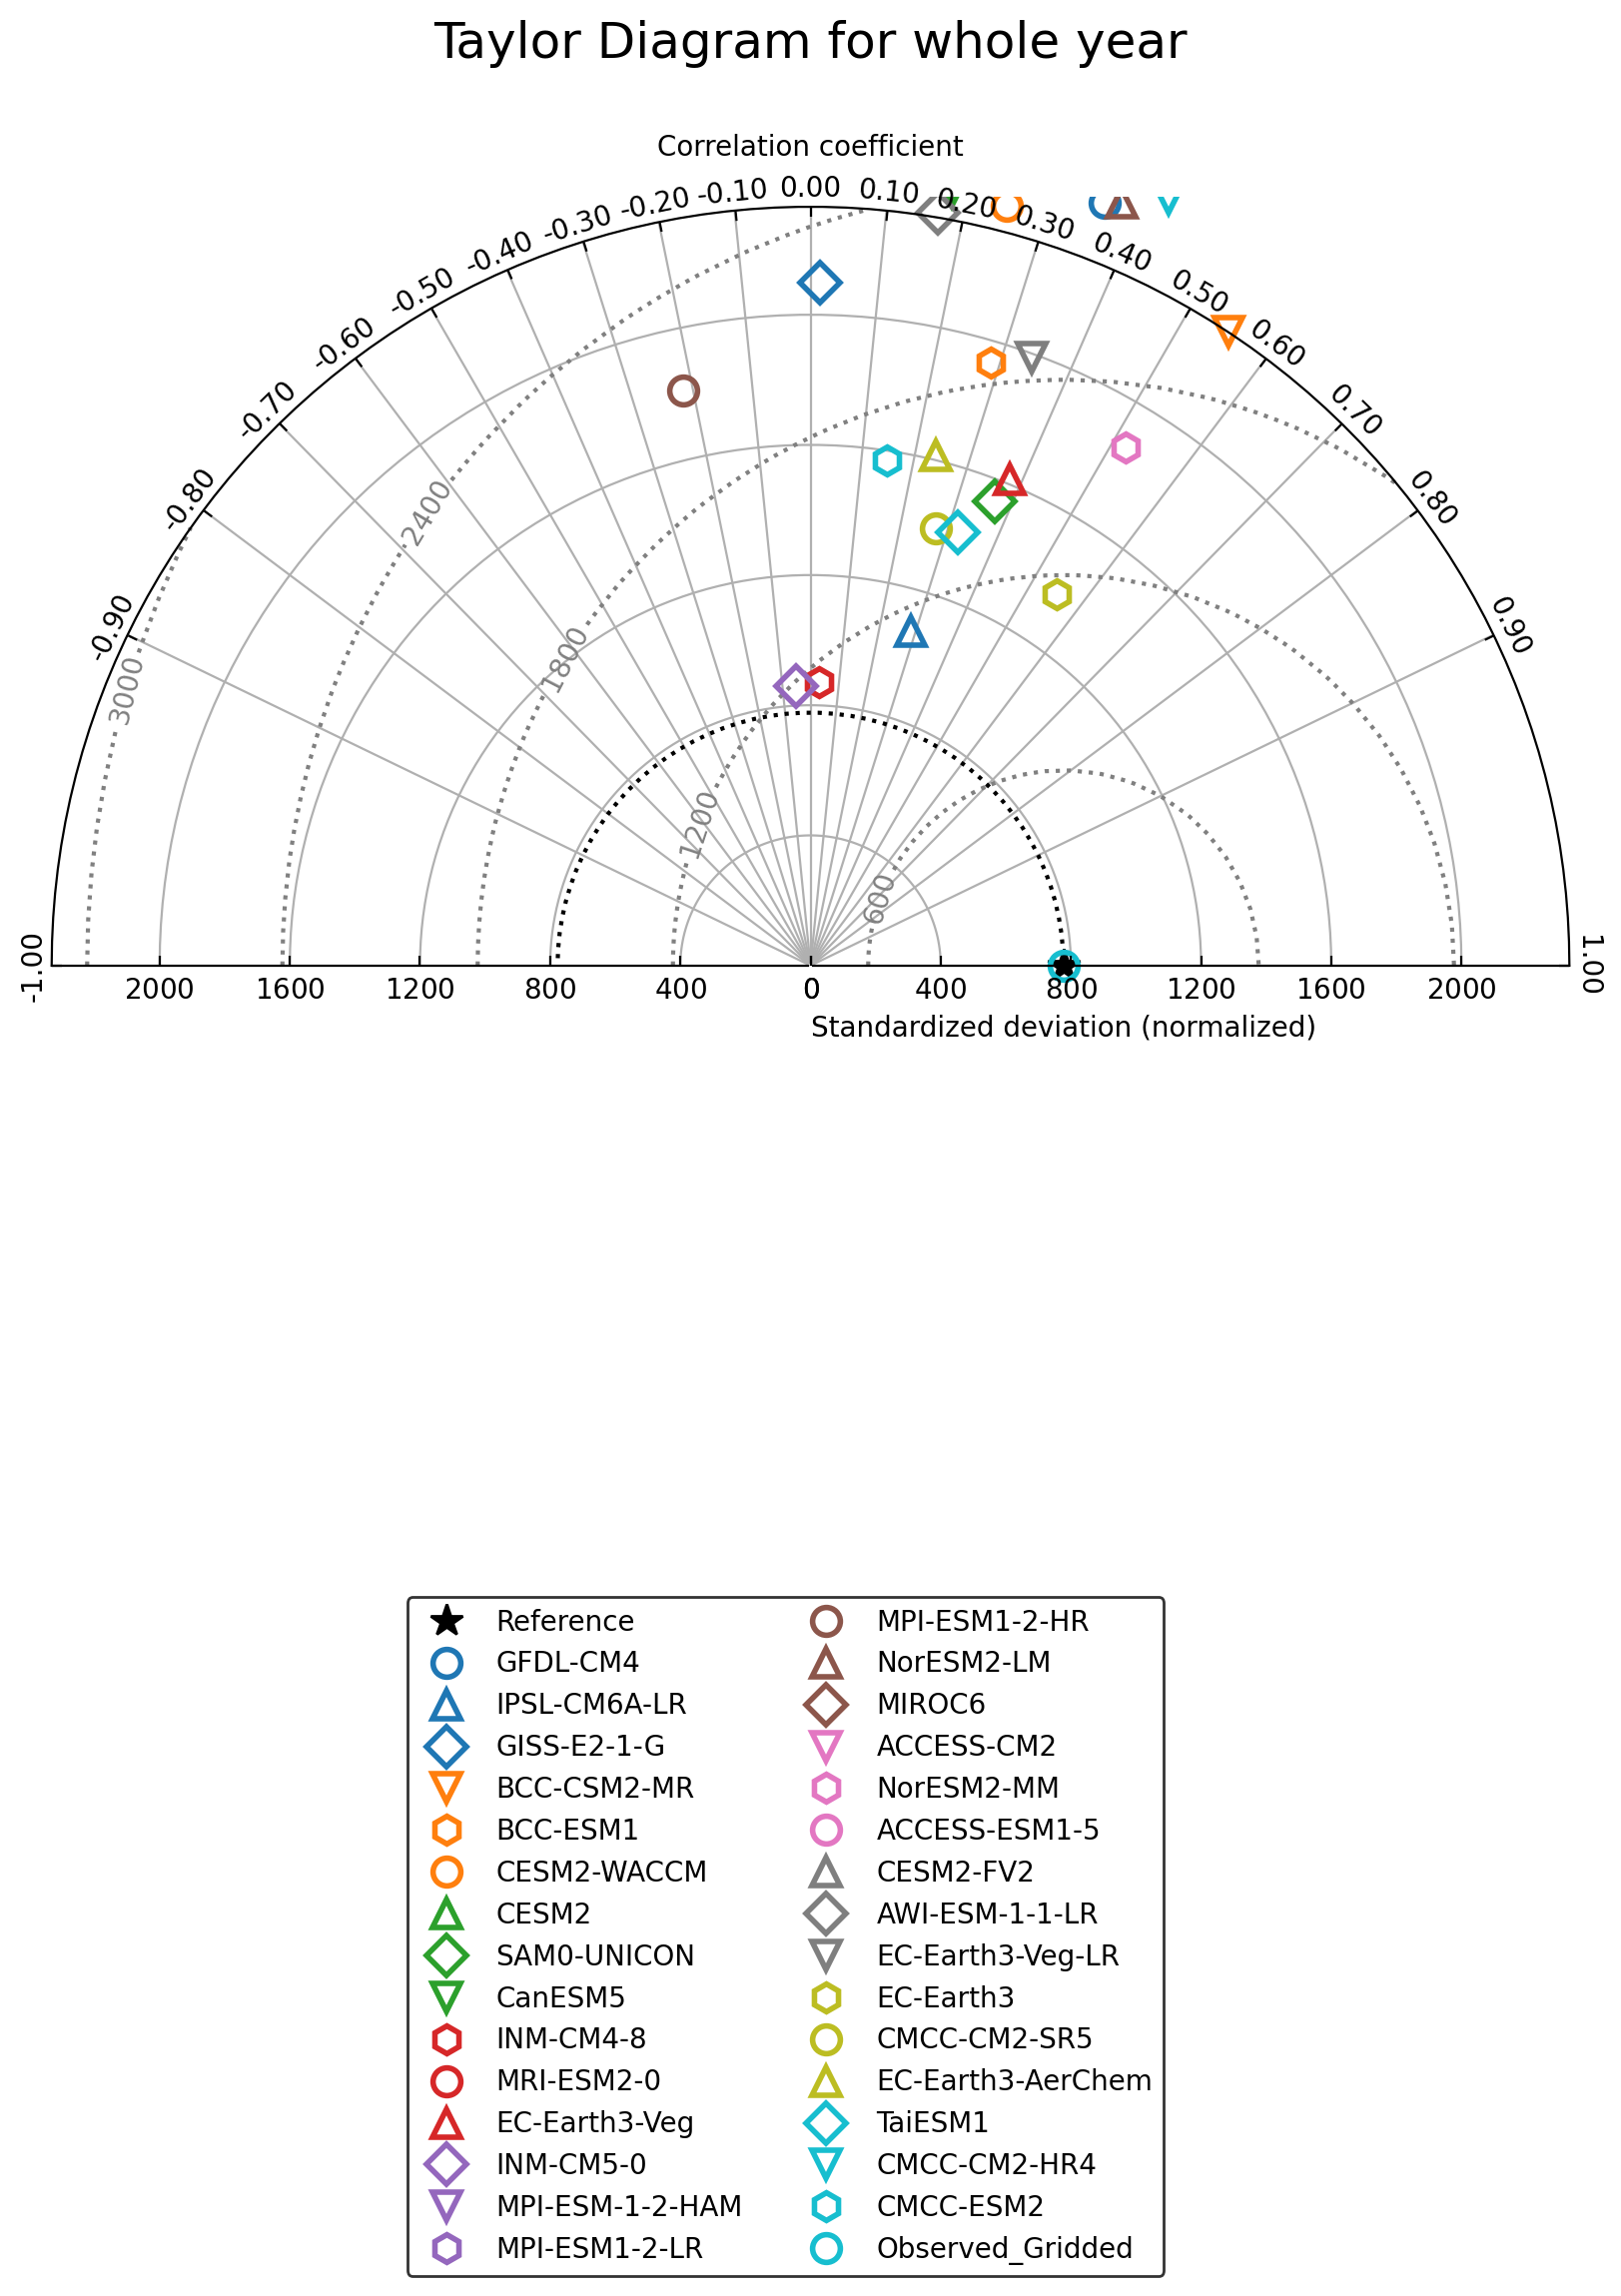

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.projections import PolarAxes
import mpl_toolkits.axisartist.grid_finder as gf
import mpl_toolkits.axisartist.floating_axes as fa

class TaylorDiagram(object):
    def __init__(self, STD, fig=None, rect=111, label='_'):
        self.STD = STD
        tr = PolarAxes.PolarTransform()

        # Correlation labels for full 180 degrees including negative correlations
        rlocs = np.concatenate((-np.arange(10, 0, -1) / 10.0, [0], np.arange(1, 11) / 10.0))
        tlocs = np.arccos(rlocs)  # Conversion to polar angles
        gl1 = gf.FixedLocator(tlocs)  # Positions
        tf1 = gf.DictFormatter({t: f"{r:.2f}" for t, r in zip(tlocs, rlocs)})

        # Set shared x-limits for both positive and negative sides
        self.smin = -self.STD
        self.smax = 3* self.STD

        gh = fa.GridHelperCurveLinear(tr, extremes=(0, np.pi, self.smin, self.smax),
                                      grid_locator1=gl1, tick_formatter1=tf1)

        if fig is None:
            fig = plt.figure(figsize=(10, 8))
        ax = fa.FloatingSubplot(fig, rect, grid_helper=gh)
        fig.add_subplot(ax)

        # Angle axis (Correlation coefficient axis)
        ax.axis['top'].set_axis_direction('bottom')
        ax.axis['top'].label.set_text("Correlation coefficient")
        ax.axis['top'].toggle(ticklabels=True, label=True)
        ax.axis['top'].major_ticklabels.set_axis_direction('top')
        ax.axis['top'].label.set_axis_direction('top')

        # Set up combined x-axis
        ax.axis['left'].set_axis_direction('bottom')
        ax.axis['left'].label.set_text("Standardized deviation (normalized)")
        ax.axis['left'].toggle(ticklabels=True, label=True)
        ax.axis['left'].major_ticklabels.set_axis_direction('bottom')
        ax.axis['left'].label.set_axis_direction('bottom')

        ax.axis['right'].set_axis_direction('top')
        ax.axis['right'].toggle(ticklabels=True, label=True)
        ax.axis['right'].major_ticklabels.set_axis_direction('bottom')
        ax.axis['right'].label.set_axis_direction('top')

        # Use matplotlib's set_ticks and set_tick_params directly
        ticks = np.linspace(self.smin, self.smax, 5)
        ax.set_xticks(ticks[ticks >= 0])
        ax.set_xticks(ticks[ticks <= 0], minor=True)
        ax.set_xticklabels([f"{v:.2f}" for v in ticks[ticks >= 0]])
        ax.set_xticklabels([f"{abs(v):.2f}" for v in ticks[ticks <= 0]], minor=True)
        ax.tick_params(axis='x', which='both', rotation=0)

        # Bottom axis (Visible)
        ax.axis['bottom'].set_visible(True)

        # Add minor ticks on Y-axis
        minor_locator = plt.MultipleLocator(0.05)
        ax.yaxis.set_minor_locator(minor_locator)
        ax.yaxis.set_minor_formatter(plt.FormatStrFormatter('%0.2f'))
        ax.tick_params(axis='y', which='minor', length=4, color='gray')

        # Contours along standard deviations
        ax.grid(True)
        self._ax = ax  # Graphical axes
        self.ax = ax.get_aux_axes(tr)  # Polar coordinates

        # Add reference point and STD contour
        l, = self.ax.plot([0], [self.STD], 'k*', ls='', ms=12, label=label)
        t = np.linspace(0, np.pi)
        r = np.zeros_like(t) + self.STD
        self.ax.plot(t, r, 'k--', label='_', alpha=1, linestyle='dotted')  # Semi-transparent and dotted

        # Collect sample points for later use (e.g., legend)
        self.samplePoints = [l]

    def add_sample(self, STD, r, *args, **kwargs):
        l, = self.ax.plot(np.arccos(r), STD, ls='', *args, **kwargs)  # (theta, radius), ls='' removes lines
        self.samplePoints.append(l)
        return l

    def add_contours(self, levels=5, **kwargs):
        rs, ts = np.meshgrid(np.linspace(self.smin, self.smax), np.linspace(0, np.pi))
        RMSE = np.sqrt(np.power(self.STD, 2) + np.power(rs, 2) - (2.0 * self.STD * rs * np.cos(ts)))
        contours = self.ax.contour(ts, rs, RMSE, levels, **{k: v for k, v in kwargs.items() if k != 'colors'}, colors='gray', linestyles='dotted')
        return contours

def srl(obsSTD, s, r, l, fname):
    fig = plt.figure(figsize=(10, 8))
    dia = TaylorDiagram(obsSTD, fig=fig, rect=111, label='Reference')
    plt.clabel(dia.add_contours(colors='#808080'), inline=1, fontsize=10)
    srlc = list(zip(s, r, l))

    # Define a color list and marker list for each model
    num_models = len(l)
    colors = plt.cm.tab10(np.linspace(0, 1, num_models))
    markers = ['o', '^', 'D', 'v', 'h']  # Basic markers

    for i, (std, corr, label) in enumerate(srlc):
        dia.add_sample(std, corr, label=label, marker=markers[i % len(markers)], mec=colors[i], mfc='none', mew=2, ms=10)

    # Move legend outside and beautify
    spl = [p.get_label() for p in dia.samplePoints]
    legend = fig.legend(dia.samplePoints, spl, numpoints=1, prop=dict(size='medium'), loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('black')
    plt.setp(legend.get_title(), fontsize='large')

    # Add title
    plt.title(f"Taylor Diagram for whole year", fontsize=18, pad=50)  # Adjust title padding
    # plt.suptitle('Overall Title', fontsize=20, y=1.05)  # Add a super title above the main title

    plt.show()

# Extract data from model_stats
STD = df_statistics_annual['Standard Deviation'].values
Correlation = df_statistics_annual['Pearson Corr'].values
Model_names = df_statistics_annual['source_id'].values

# Reference standard deviation (BMD)
obsSTD = df_statistics_annual.loc[df_statistics_annual['source_id'] == 'Observed_Gridded', 'Standard Deviation'].values[0]
obsSTD = obsSTD
# Plot Taylor diagram
srl(obsSTD, STD, Correlation, Model_names, 'TaylorDiagram.jpg')


In [ ]:
import pandas as pd
import numpy as np
import xarray as xr
import fsspec

# Define the latitude and longitude range for clipping
lat_range = slice(17, 29)  # Example latitude range from 17 to 29 degrees
lon_range = slice(84, 96)  # Example longitude range from 84 to 96 degrees

# Pre-compute new grid coordinates
new_lon = np.arange(88.52, 90.82, 0.25)
new_lat = np.arange(21.99, 24.99, 0.25)

# Function to calculate annual sum and regrid
def calculate_annual_sum_and_regrid(ds, new_lon, new_lat):
    # Clip the dataset to the desired time range
    ds_clipped = ds.sel(time=slice('1995-01-01', '2014-12-31'))
    # Sum for the entire year
    ds_annual_sum = ds_clipped.resample(time='1Y').sum(dim='time')
    # Regrid to the new grid using nearest neighbor interpolation
    ds_regridded = ds_annual_sum.interp(lon=new_lon, lat=new_lat, method='linear')
    return ds_regridded

# Create an empty DataFrame to store statistics
statistics_data = []

# Load BMD_Gridded
BMD_Gridded = xr.open_dataset('/content/avg_hum_Krigging.nc')
# Set the date to the last day of each month
dates = pd.to_datetime(BMD_Gridded['time'].values, unit='ns')
dates = dates.to_period('M').to_timestamp('M') + pd.offsets.MonthEnd(1)
BMD_Gridded = BMD_Gridded.assign_coords(Date=('time', dates))
BMD_Gridded = BMD_Gridded.swap_dims({'time': 'Date'})
BMD_Gridded = BMD_Gridded.sel(Date=slice('1995-01', '2014-12'))
BMD_monthly_filtered = BMD_Gridded['rainfall'].sel(Date=BMD_Gridded['Date'].dt.month.isin([1, 2, 3]))
BMD_annual_sum = BMD_monthly_filtered.resample(Date='YE').sum(dim='Date')
BMD_Gridded = xr.Dataset({'rainfall': BMD_annual_sum})

# Regrid BMD_Gridded to the new grid using nearest neighbor interpolation
BMD_regridded = BMD_Gridded.interp(lon=new_lon, lat=new_lat, method='linear')

# Calculate sum of annual sums for the observed data
BMD_sum_annual_sum = BMD_regridded['rainfall']

# Flatten the data arrays for non-zero value filtering
BMD_array = BMD_sum_annual_sum.values.flatten()
BMD_array = np.nan_to_num(BMD_array, nan=0)
BMD_array_filtered = BMD_array[BMD_array != 0]

# Calculate mean and standard deviation for BMD_Gridded using non-zero values
bmd_mean = BMD_array_filtered.mean()
bmd_std = BMD_array_filtered.std()

# Iterate over each row in df_ta_ncar (assuming this DataFrame is defined elsewhere in your script)
for _, row in df_ta.iterrows():
    # Get the zstore value and source_id
    zstore = row['zstore']
    source_id = row['source_id']

    try:
        # Create a mutable-mapping-style interface to the store
        mapper = fsspec.get_mapper(zstore)
        # Open the zarr store using xarray
        ds = xr.open_zarr(mapper, consolidated=True, decode_times=True)
        if 'plev' in ds.dims:
            try:
                ds = ds.sel(plev=100000, method='nearest')  # Use nearest method for selecting pressure level
            except KeyError as ke:
                print(f"KeyError: Unable to find a near-surface pressure level for {source_id}. Skipping this dataset.")
                continue  # Skip this dataset if the near-surface pressure level is unavailable
        # Clip the dataset based on latitude and longitude ranges
        clipped_ds = ds.sel(lat=lat_range, lon=lon_range)

        # Sum for the entire year
        clipped_ds_filtered = clipped_ds.sel(time=clipped_ds['time'].dt.month.isin([1, 2, 3]))
        clipped_ds_sum = clipped_ds_filtered.resample(time='1Y').sum(dim='time')

        # Clip the dataset to the desired time range
        clipped_ds_sum = clipped_ds_sum.sel(time=slice('1995-01-01', '2014-12-31'))

        # Multiply by 86400
        # clipped_ds_sum *= 86400

        # Regrid to the new grid using nearest neighbor interpolation
        annual_sum_and_regridded = clipped_ds_sum.interp(lon=new_lon, lat=new_lat, method='linear')

        # Calculate sum of annual sums for the model data
        sum_annual_sum = annual_sum_and_regridded['hur']

        # Flatten the data arrays for correlation calculation
        BMD_array = BMD_sum_annual_sum.values.flatten()
        model_array = sum_annual_sum.values.flatten()

        # Replace NaN values with 0
        BMD_array = np.nan_to_num(BMD_array, nan=0)
        model_array = np.nan_to_num(model_array, nan=0)

        # Find indices where both BMD_array and model_array are not equal to zero
        nonzero_indices = (BMD_array != 0) & (model_array != 0)

        # Use these indices to filter BMD_array and model_array
        BMD_array_filtered = BMD_array[nonzero_indices]
        model_array_filtered = model_array[nonzero_indices]

        # Calculate Pearson correlation coefficient
        if BMD_array_filtered.size > 0 and model_array_filtered.size > 0:
            pearson_corr = np.corrcoef(BMD_array_filtered, model_array_filtered)[0, 1]

            # Calculate RMSE
            rmse = np.sqrt(np.mean((BMD_array_filtered - model_array_filtered) ** 2))

            # Calculate MAE
            mae = np.mean(np.abs(BMD_array_filtered - model_array_filtered))

            # Calculate NSE
            nse = 1 - (np.sum((BMD_array_filtered - model_array_filtered) ** 2) /
                       np.sum((BMD_array_filtered - BMD_array_filtered.mean()) ** 2))
        else:
            pearson_corr = None
            rmse = None
            mae = None
            nse = None

        # Append statistics to the DataFrame
        statistics_data.append({
            'source_id': source_id,
            'Mean': model_array_filtered.mean(),
            'Standard Deviation': model_array_filtered.std(),
            'Pearson Corr': pearson_corr,
            'RMSE': rmse,
            'MAE': mae,
            'NSE': nse,
        })

    except KeyError as ke:
        print(f"KeyError processing {zstore}: {ke}")

    except IndexError as ie:
        print(f"IndexError processing {zstore}: {ie}")

    except ValueError as ve:
        print(f"ValueError processing {zstore}: {ve}")

    except Exception as e:
        print(f"Error processing {zstore}: {e}")

# Append statistics for BMD_Gridded to the DataFrame
statistics_data.append({
    'source_id': 'Observed_Gridded',
    'Mean': bmd_mean,
    'Standard Deviation': bmd_std,
    'Pearson Corr': 1.0,  # Correlation with itself is 1.0
    'RMSE': 0.0,  # No error with itself
    'MAE': 0.0,
    'NSE': 1.0,  # Perfect NSE with itself
})

# Create a DataFrame from the statistics data
df_statistics_annual_Monthwise = pd.DataFrame(statistics_data)
# Display the statistics DataFrame
print(df_statistics_annual_Monthwise)


<string>:7: FutureWarning: 'Y' is deprecated and will be removed in a future version. Please use 'YE' instead of 'Y'.
/usr/local/lib/python3.10/dist-packages/xarray/groupers.py:487: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(
<string>:7: FutureWarning: 'Y' is deprecated and will be removed in a future version. Please use 'YE' instead of 'Y'.
<string>:7: FutureWarning: 'Y' is deprecated and will be removed in a future version. Please use 'YE' instead of 'Y'.
<string>:7: FutureWarning: 'Y' is deprecated and will be removed in a future version. Please use 'YE' instead of 'Y'.
<string>:7: FutureWarning: 'Y' is deprecated and will be removed in a future version. Please use 'YE' instead of 'Y'.
<string>:7: FutureWarning: 'Y' is deprecated and will be removed in a future version. Please use 'YE' instead of 'Y'.
<string>:7: FutureWarning: 'Y' is deprecated and will be removed in a future version. Please u

ValueError processing gs://cmip6/CMIP6/CMIP/NIMS-KMA/KACE-1-0-G/historical/r1i1p1f1/day/hur/gr/v20210108/: invalid day number provided in cftime.Datetime360Day(2014, 12, 31, 0, 0, 0, 0, has_year_zero=True)


<string>:7: FutureWarning: 'Y' is deprecated and will be removed in a future version. Please use 'YE' instead of 'Y'.


            source_id         Mean  Standard Deviation  Pearson Corr  \
0            GFDL-CM4  3862.895444          510.691580      0.228026   
1        IPSL-CM6A-LR  3103.213965          677.576201     -0.040314   
2         GISS-E2-1-G  1029.433429          675.672052      0.038674   
3         BCC-CSM2-MR  3959.538247          888.306958      0.249117   
4            BCC-ESM1  3591.181347          691.450945      0.092128   
5         CESM2-WACCM  3316.866777         1101.204350      0.005857   
6               CESM2  3279.176089         1192.241511      0.228047   
7         SAM0-UNICON  3342.668901         1134.284266      0.143733   
8             CanESM5  4297.734682          642.570549      0.091941   
9           INM-CM4-8  6067.243182          560.015531     -0.302858   
10         MRI-ESM2-0  4818.538109          528.034861     -0.081605   
11      EC-Earth3-Veg  3306.784249          695.835614      0.177386   
12          INM-CM5-0  5390.874958          465.669459     -0.16

<ipython-input-16-bf4f6fe06727>:75: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  self.ax.plot(t, r, 'k--', label='_', alpha=1, linestyle='dotted')  # Semi-transparent and dotted


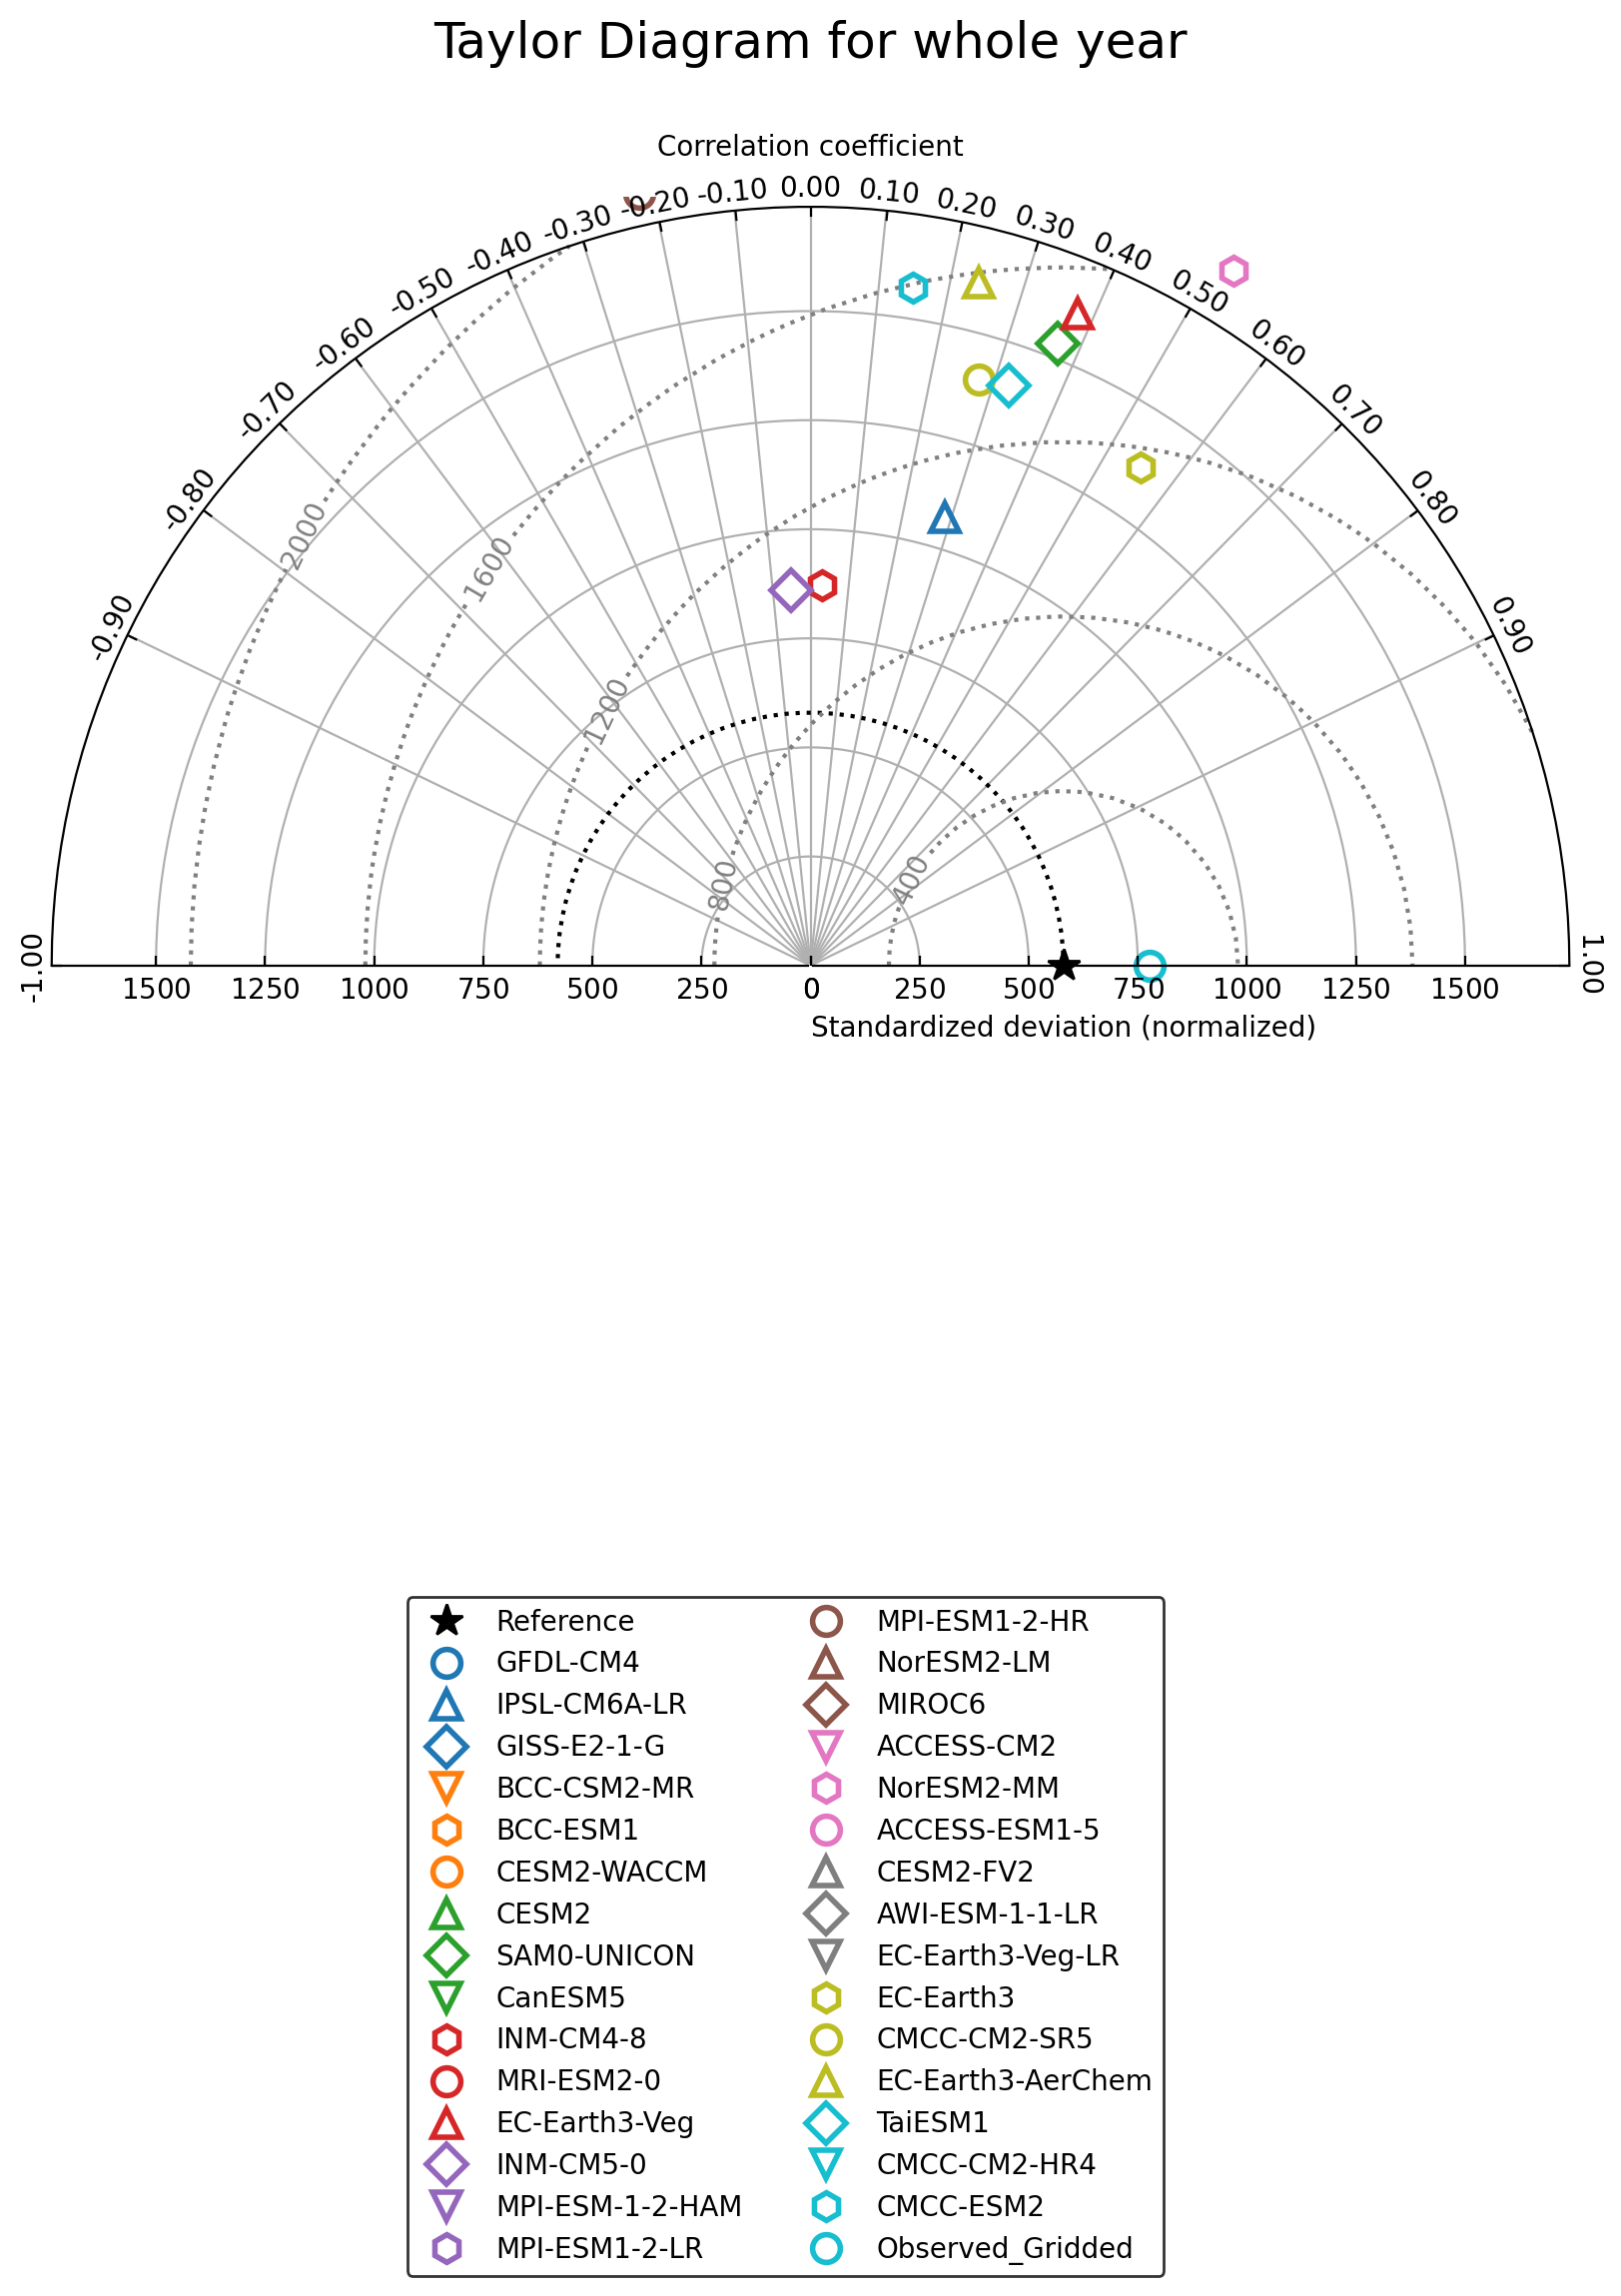

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.projections import PolarAxes
import mpl_toolkits.axisartist.grid_finder as gf
import mpl_toolkits.axisartist.floating_axes as fa

class TaylorDiagram(object):
    def __init__(self, STD, fig=None, rect=111, label='_'):
        self.STD = STD
        tr = PolarAxes.PolarTransform()

        # Correlation labels for full 180 degrees including negative correlations
        rlocs = np.concatenate((-np.arange(10, 0, -1) / 10.0, [0], np.arange(1, 11) / 10.0))
        tlocs = np.arccos(rlocs)  # Conversion to polar angles
        gl1 = gf.FixedLocator(tlocs)  # Positions
        tf1 = gf.DictFormatter({t: f"{r:.2f}" for t, r in zip(tlocs, rlocs)})

        # Set shared x-limits for both positive and negative sides
        self.smin = -self.STD
        self.smax = 3* self.STD

        gh = fa.GridHelperCurveLinear(tr, extremes=(0, np.pi, self.smin, self.smax),
                                      grid_locator1=gl1, tick_formatter1=tf1)

        if fig is None:
            fig = plt.figure(figsize=(10, 8))
        ax = fa.FloatingSubplot(fig, rect, grid_helper=gh)
        fig.add_subplot(ax)

        # Angle axis (Correlation coefficient axis)
        ax.axis['top'].set_axis_direction('bottom')
        ax.axis['top'].label.set_text("Correlation coefficient")
        ax.axis['top'].toggle(ticklabels=True, label=True)
        ax.axis['top'].major_ticklabels.set_axis_direction('top')
        ax.axis['top'].label.set_axis_direction('top')

        # Set up combined x-axis
        ax.axis['left'].set_axis_direction('bottom')
        ax.axis['left'].label.set_text("Standardized deviation (normalized)")
        ax.axis['left'].toggle(ticklabels=True, label=True)
        ax.axis['left'].major_ticklabels.set_axis_direction('bottom')
        ax.axis['left'].label.set_axis_direction('bottom')

        ax.axis['right'].set_axis_direction('top')
        ax.axis['right'].toggle(ticklabels=True, label=True)
        ax.axis['right'].major_ticklabels.set_axis_direction('bottom')
        ax.axis['right'].label.set_axis_direction('top')

        # Use matplotlib's set_ticks and set_tick_params directly
        ticks = np.linspace(self.smin, self.smax, 5)
        ax.set_xticks(ticks[ticks >= 0])
        ax.set_xticks(ticks[ticks <= 0], minor=True)
        ax.set_xticklabels([f"{v:.2f}" for v in ticks[ticks >= 0]])
        ax.set_xticklabels([f"{abs(v):.2f}" for v in ticks[ticks <= 0]], minor=True)
        ax.tick_params(axis='x', which='both', rotation=0)

        # Bottom axis (Visible)
        ax.axis['bottom'].set_visible(True)

        # Add minor ticks on Y-axis
        minor_locator = plt.MultipleLocator(0.05)
        ax.yaxis.set_minor_locator(minor_locator)
        ax.yaxis.set_minor_formatter(plt.FormatStrFormatter('%0.2f'))
        ax.tick_params(axis='y', which='minor', length=4, color='gray')

        # Contours along standard deviations
        ax.grid(True)
        self._ax = ax  # Graphical axes
        self.ax = ax.get_aux_axes(tr)  # Polar coordinates

        # Add reference point and STD contour
        l, = self.ax.plot([0], [self.STD], 'k*', ls='', ms=12, label=label)
        t = np.linspace(0, np.pi)
        r = np.zeros_like(t) + self.STD
        self.ax.plot(t, r, 'k--', label='_', alpha=1, linestyle='dotted')  # Semi-transparent and dotted

        # Collect sample points for later use (e.g., legend)
        self.samplePoints = [l]

    def add_sample(self, STD, r, *args, **kwargs):
        l, = self.ax.plot(np.arccos(r), STD, ls='', *args, **kwargs)  # (theta, radius), ls='' removes lines
        self.samplePoints.append(l)
        return l

    def add_contours(self, levels=5, **kwargs):
        rs, ts = np.meshgrid(np.linspace(self.smin, self.smax), np.linspace(0, np.pi))
        RMSE = np.sqrt(np.power(self.STD, 2) + np.power(rs, 2) - (2.0 * self.STD * rs * np.cos(ts)))
        contours = self.ax.contour(ts, rs, RMSE, levels, **{k: v for k, v in kwargs.items() if k != 'colors'}, colors='gray', linestyles='dotted')
        return contours

def srl(obsSTD, s, r, l, fname):
    fig = plt.figure(figsize=(10, 8))
    dia = TaylorDiagram(obsSTD, fig=fig, rect=111, label='Reference')
    plt.clabel(dia.add_contours(colors='#808080'), inline=1, fontsize=10)
    srlc = list(zip(s, r, l))

    # Define a color list and marker list for each model
    num_models = len(l)
    colors = plt.cm.tab10(np.linspace(0, 1, num_models))
    markers = ['o', '^', 'D', 'v', 'h']  # Basic markers

    for i, (std, corr, label) in enumerate(srlc):
        dia.add_sample(std, corr, label=label, marker=markers[i % len(markers)], mec=colors[i], mfc='none', mew=2, ms=10)

    # Move legend outside and beautify
    spl = [p.get_label() for p in dia.samplePoints]
    legend = fig.legend(dia.samplePoints, spl, numpoints=1, prop=dict(size='medium'), loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('black')
    plt.setp(legend.get_title(), fontsize='large')

    # Add title
    plt.title(f"Taylor Diagram for whole year", fontsize=18, pad=50)  # Adjust title padding
    # plt.suptitle('Overall Title', fontsize=20, y=1.05)  # Add a super title above the main title

    plt.show()

# Extract data from model_stats
STD = df_statistics_annual['Standard Deviation'].values
Correlation = df_statistics_annual['Pearson Corr'].values
Model_names = df_statistics_annual['source_id'].values

# Reference standard deviation (BMD)
obsSTD = df_statistics_annual_Monthwise.loc[df_statistics_annual['source_id'] == 'Observed_Gridded', 'Standard Deviation'].values[0]
obsSTD = obsSTD
# Plot Taylor diagram
srl(obsSTD, STD, Correlation, Model_names, 'TaylorDiagram.jpg')


In [ ]:
O